In [1]:
import pandas as pd


In [46]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


In [30]:
train['mta_tax'].value_counts()


0.5    34085
0.0      915
Name: mta_tax, dtype: int64

In [4]:
train.corrwith(train['calculated_total_amount']).sort_values(ascending=False)

calculated_total_amount    1.000000
tip_amount                 0.021426
trip_duration              0.006518
extra                      0.004083
mta_tax                    0.001764
total_amount               0.001413
trip_distance              0.001392
hour_of_day                0.001093
month                      0.000863
tolls_amount               0.000835
day_of_week                0.000730
day                       -0.001215
dropoff_location_id       -0.001443
pickup_location_id        -0.004395
fare_amount               -0.004883
imp_surcharge             -0.008944
rate_code                 -0.011716
payment_type              -0.040477
year                            NaN
dtype: float64

In [44]:
def preprocess(train):
    train['store_and_fwd_flag'] = train['store_and_fwd_flag'].map({'N': 0, 'Y': 1})
    train = pd.get_dummies(
        train, columns=['rate_code', 'payment_type', 'mta_tax', 'imp_surcharge'], drop_first=False)
    return train


In [47]:
train=preprocess(train)
X=train.drop(['calculated_total_amount'],axis=1)
y=train['calculated_total_amount']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, n_jobs=4)

In [35]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

<AxesSubplot:ylabel='feature'>

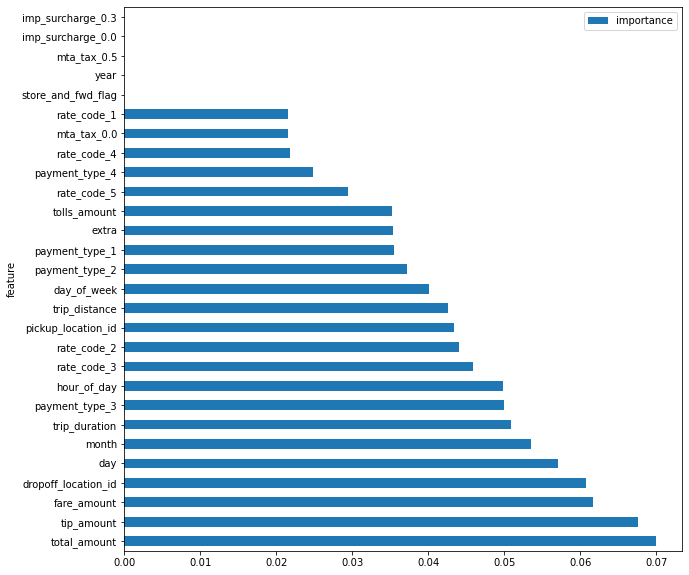

In [40]:
pd.DataFrame({'feature': X_train.columns, 'importance': xgb.feature_importances_}).sort_values('importance', ascending=False).plot(kind='barh', x='feature', figsize=(10, 10))

In [36]:
preds=xgb.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt

sqrt(mean_squared_error(y_test, preds))

19.356011602732682

In [41]:
submission = pd.read_csv('submission.csv')

In [42]:
test = pd.read_csv('test.csv')
test = preprocess(test)
submission['calculated_total_amount'] = ans

In [43]:
submission.to_csv('submission2.csv', index=False)

In [48]:
train['calculated_total_amount'].describe()

count    35000.000000
mean        41.324249
std         19.167043
min          0.310000
25%         30.300000
50%         38.460000
75%         48.200000
max        468.350000
Name: calculated_total_amount, dtype: float64